In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data = np.genfromtxt('Salary_dataset.csv', delimiter=',')[1:,:]
data

array([[0.00000e+00, 1.20000e+00, 3.93440e+04],
       [1.00000e+00, 1.40000e+00, 4.62060e+04],
       [2.00000e+00, 1.60000e+00, 3.77320e+04],
       [3.00000e+00, 2.10000e+00, 4.35260e+04],
       [4.00000e+00, 2.30000e+00, 3.98920e+04],
       [5.00000e+00, 3.00000e+00, 5.66430e+04],
       [6.00000e+00, 3.10000e+00, 6.01510e+04],
       [7.00000e+00, 3.30000e+00, 5.44460e+04],
       [8.00000e+00, 3.30000e+00, 6.44460e+04],
       [9.00000e+00, 3.80000e+00, 5.71900e+04],
       [1.00000e+01, 4.00000e+00, 6.32190e+04],
       [1.10000e+01, 4.10000e+00, 5.57950e+04],
       [1.20000e+01, 4.10000e+00, 5.69580e+04],
       [1.30000e+01, 4.20000e+00, 5.70820e+04],
       [1.40000e+01, 4.60000e+00, 6.11120e+04],
       [1.50000e+01, 5.00000e+00, 6.79390e+04],
       [1.60000e+01, 5.20000e+00, 6.60300e+04],
       [1.70000e+01, 5.40000e+00, 8.30890e+04],
       [1.80000e+01, 6.00000e+00, 8.13640e+04],
       [1.90000e+01, 6.10000e+00, 9.39410e+04],
       [2.00000e+01, 6.90000e+00, 9.1739

In [3]:
x = np.insert(data[:, :-1], 0, 1, axis=1).T
y = data[:, -1:].T
x, y

(array([[ 1. ,  1. ,  1. ,  1. ,  1. ,  1. ,  1. ,  1. ,  1. ,  1. ,  1. ,
          1. ,  1. ,  1. ,  1. ,  1. ,  1. ,  1. ,  1. ,  1. ,  1. ,  1. ,
          1. ,  1. ,  1. ,  1. ,  1. ,  1. ,  1. ,  1. ],
        [ 0. ,  1. ,  2. ,  3. ,  4. ,  5. ,  6. ,  7. ,  8. ,  9. , 10. ,
         11. , 12. , 13. , 14. , 15. , 16. , 17. , 18. , 19. , 20. , 21. ,
         22. , 23. , 24. , 25. , 26. , 27. , 28. , 29. ],
        [ 1.2,  1.4,  1.6,  2.1,  2.3,  3. ,  3.1,  3.3,  3.3,  3.8,  4. ,
          4.1,  4.1,  4.2,  4.6,  5. ,  5.2,  5.4,  6. ,  6.1,  6.9,  7.2,
          8. ,  8.3,  8.8,  9.1,  9.6,  9.7, 10.4, 10.6]]),
 array([[ 39344.,  46206.,  37732.,  43526.,  39892.,  56643.,  60151.,
          54446.,  64446.,  57190.,  63219.,  55795.,  56958.,  57082.,
          61112.,  67939.,  66030.,  83089.,  81364.,  93941.,  91739.,
          98274., 101303., 113813., 109432., 105583., 116970., 112636.,
         122392., 121873.]]))

In [21]:
def mse_error(w, x, y):
    return np.mean(np.square(w.T@x - y), axis=1, keepdims=True)

# 1, Su dung phuong phap thuan toan (dao ham = 0)

In [17]:
# Linear regression
_x = x.T; _y = y.T
w_math = np.linalg.inv(_x.T@_x)@_x.T@_y
w_math

array([[23850.87473813],
       [ -482.89177423],
       [10927.65812589]])

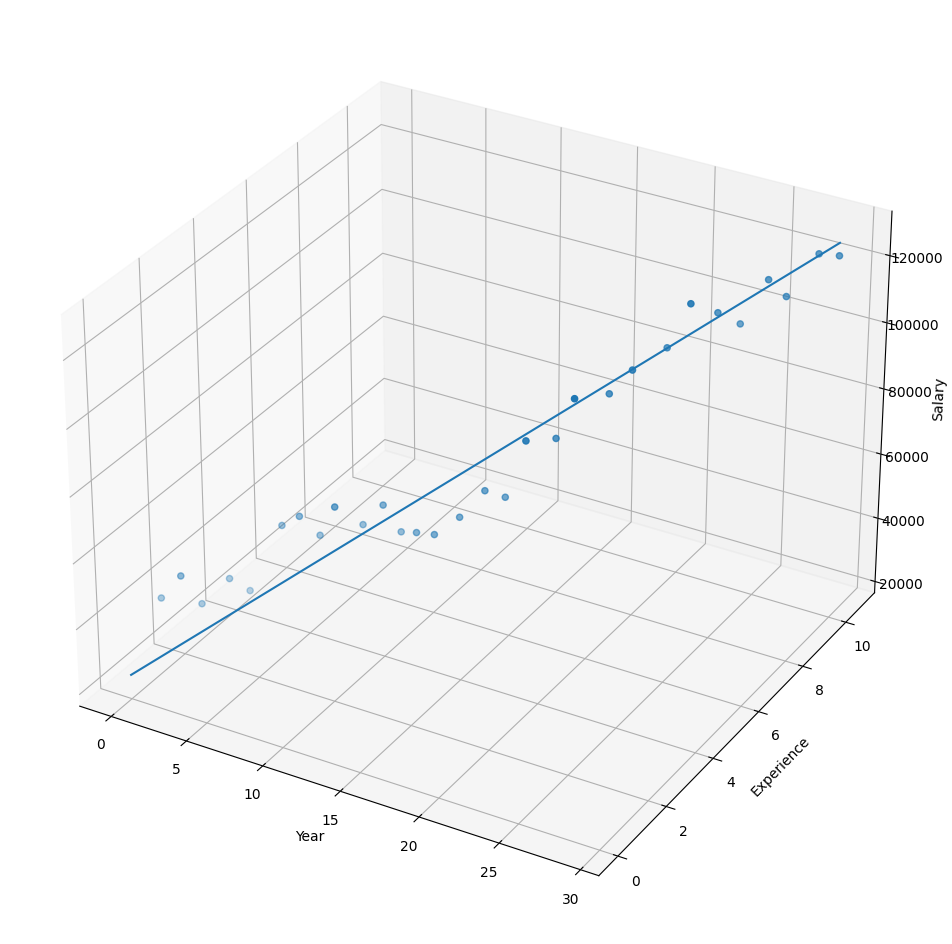

In [15]:
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(projection='3d')
w = np.squeeze(np.linalg.inv(_x.T@_x)@_x.T@_y, axis=1)

ax.scatter(x[1:2,:], x[2:3,:], y)
features = [0, np.linspace(0, np.max(x[1,:]), 100), np.linspace(0, max(x[2,:]), 100)]
ax.plot(features[1], features[2], w[0] + features[1]*w[1] + features[2]*w[2])
ax.set_xlabel('Year')
ax.set_ylabel('Experience')
ax.set_zlabel('Salary')
plt.show()

In [ ]:
# Ridge Regression
lams = [1, 0.1, 0.01, 0.001, 0.0001]
table = dict()
d, n = x.shape
_x = x.T; _y = y.T
for lam in lams:
    a = np.zeros((d, d))
    np.fill_diagonal(a, n*lam)
    w_ridge = np.linalg.inv(_x.T@_x + a)@_x.T@_y
    table[lam] = mse_error(w_ridge, x, y) # error
# lambda, error
table

{1: 18792.821848989694,
 0.1: 7082.560453619431,
 0.01: 1174.3591201920274,
 0.001: 126.76776997269585,
 0.0001: 12.779595437698966}

# 2, Phuong phap sgd

In [8]:
# Linear Regression
def dMean_Square_Loss_w(x, y, w): # w[0] = bias term
    return 2*np.mean(x*(w.T@x - y), axis=1, keepdims=True)

def sgd(x, y, step=0.001, max_iters=10000):
    d, n = x.shape
    w = np.random.rand(d, 1)
    gradient = dMean_Square_Loss_w
    
    np.random.seed(0)
    for i in range(max_iters):
        j = np.random.randint(n)
        xj = x[:,j:j+1]; yj = y[:,j:j+1]
        w = w - step*gradient(xj, yj, w)
    return w

In [9]:
# Ridge Regression
def dRidge_w(x, y, w, lam):
    return 2*np.mean(x*(w.T@x - y), axis=1, keepdims=True) + 2*lam*w

def ridgeReg_sgd(x, y, lam=0.0001, step=0.001, max_iters=10000):
    d, n = x.shape
    w = np.random.rand(d, 1)
    gradient = dRidge_w
    
    np.random.seed(0)
    for i in range(max_iters):
        j = np.random.randint(n)
        xj = x[:,j:j+1]; yj = y[:,j:j+1]
        w = w - step*gradient(xj, yj, w, lam)
    return w

In [26]:
# Lasso Regression
def dLasso_w(x, y, w, lam):
    return 2*np.mean(x*(w.T@x - y), axis=1, keepdims=True) + lam*np.where(w >= 0, 1, -1)

def lassoReg_sgd(x, y, lam=0.0001, step=0.001, max_iters=10000):
    d, n = x.shape
    w = np.random.rand(d, 1)
    gradient = dLasso_w
    
    np.random.seed(0)
    for i in range(max_iters):
        j = np.random.randint(n)
        xj = x[:,j:j+1]; yj = y[:,j:j+1]
        w = w - step*gradient(xj, yj, w, lam)
    return w

In [11]:
w_math_sgd = sgd(x, y)
w_ridgeReg = ridgeReg_sgd(x, y)
w_lassoReg = lassoReg_sgd(x, y)
print(w_math.T)
print(w_math_sgd.T)
print(w_ridgeReg.T)
print(w_lassoReg.T)

[[23850.87473813  -482.89177423 10927.65812589]]
[[22972.28756874  -425.15180825 11348.87821199]]
[[22963.765053    -424.82996332 11349.94029142]]
[[22972.28851127  -425.15155136 11348.87729773]]


In [27]:
# Tunning Lambda for Ridge Regression
lams = [1, 0.1, 0.01, 0.001, 0.0001]
table = dict()
d, n = x.shape
_x = x.T; _y = y.T
for lam in lams:
    w_ridge = ridgeReg_sgd(x, y, lam)
    table[lam] = mse_error(w_ridge, x, y) # error

# lambda, error
table

{1: array([[3.17738856e+08]]),
 0.1: array([[78679467.2814961]]),
 0.01: array([[41602145.6867966]]),
 0.001: array([[38882199.82150568]]),
 0.0001: array([[38631062.37117355]])}

In [28]:
# Tunning Lambda for Lasso Regression
lams = [1, 0.1, 0.01, 0.001, 0.0001]
table = dict()
d, n = x.shape
_x = x.T; _y = y.T
for lam in lams:
    w_lasso = lassoReg_sgd(x, y, lam)
    table[lam] = mse_error(w_lasso, x, y) # error

# lambda, error
table

{1: array([[38608182.29292365]]),
 0.1: array([[38603889.46892436]]),
 0.01: array([[38603460.36106888]]),
 0.001: array([[38603417.45202862]]),
 0.0001: array([[38603413.16114216]])}